In [48]:
# Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [49]:
%matplotlib inline

In [6]:
# Series in pandas
s = pd.Series([0.1, 0.2, 0.3, 0.4])

In [7]:
print s

0    0.1
1    0.2
2    0.3
3    0.4
dtype: float64


In [8]:
s.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
print s.values

[ 0.1  0.2  0.3  0.4]


In [10]:
# Index can be some other type
s = pd.Series(np.arange(4), index = ['a', 'b', 'c', 'd'])
print s

a    0
b    1
c    2
d    3
dtype: int64


In [11]:
print s['d']

3


In [13]:
# Can be initialized with a dict as well
s = pd.Series({'a':1, 'b':2, 'c':3, 'd':4})
print s

a    1
b    2
c    3
d    4
dtype: int64


In [14]:
# Elementwise operations
print s*100

a    100
b    200
c    300
d    400
dtype: int64


In [18]:
# Slicing, NOTE this includes 'c', which it wouldn't when slicing a python
# list
s['b':'c']

b    2
c    3
dtype: int64

In [20]:
# List indexing
print s[['b','c']]
print s[['b','d']]

b    2
c    3
dtype: int64
b    2
d    4
dtype: int64


In [26]:
# bool indexing
print s>2
print s[s>2]

a    False
b    False
c     True
d     True
dtype: bool
c    3
d    4
dtype: int64


In [22]:
s.mean()

2.5

In [23]:
# I guess 'a' becomes NaN because it gets some number from the first term
# but not from the other, so it is 1 + NaN = NaN
s['a':'b'] + s['b':'c']

a   NaN
b     4
c   NaN
dtype: float64

In [24]:
data = {'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
...        'population': [11.3, 64.3, 81.3, 16.9, 64.9],
...        'area': [30510, 671308, 357050, 41526, 244820],
...        'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London']}

In [25]:
data

{'area': [30510, 671308, 357050, 41526, 244820],
 'capital': ['Brussels', 'Paris', 'Berlin', 'Amsterdam', 'London'],
 'country': ['Belgium', 'France', 'Germany', 'Netherlands', 'United Kingdom'],
 'population': [11.3, 64.3, 81.3, 16.9, 64.9]}

In [28]:
countries = pd.DataFrame(data)
print countries

     area    capital         country  population
0   30510   Brussels         Belgium        11.3
1  671308      Paris          France        64.3
2  357050     Berlin         Germany        81.3
3   41526  Amsterdam     Netherlands        16.9
4  244820     London  United Kingdom        64.9


In [29]:
countries.index

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [30]:
countries.columns

Index([u'area', u'capital', u'country', u'population'], dtype='object')

In [31]:
countries.dtypes

area            int64
capital        object
country        object
population    float64
dtype: object

In [32]:
countries.values

array([[30510, 'Brussels', 'Belgium', 11.3],
       [671308, 'Paris', 'France', 64.3],
       [357050, 'Berlin', 'Germany', 81.3],
       [41526, 'Amsterdam', 'Netherlands', 16.9],
       [244820, 'London', 'United Kingdom', 64.9]], dtype=object)

In [33]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 4 columns):
area          5 non-null int64
capital       5 non-null object
country       5 non-null object
population    5 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 200.0+ bytes


In [34]:
print countries

     area    capital         country  population
0   30510   Brussels         Belgium        11.3
1  671308      Paris          France        64.3
2  357050     Berlin         Germany        81.3
3   41526  Amsterdam     Netherlands        16.9
4  244820     London  United Kingdom        64.9


In [35]:
countries = countries.set_index('country')

In [36]:
print countries

                  area    capital  population
country                                      
Belgium          30510   Brussels        11.3
France          671308      Paris        64.3
Germany         357050     Berlin        81.3
Netherlands      41526  Amsterdam        16.9
United Kingdom  244820     London        64.9


In [37]:
print countries['area']

country
Belgium            30510
France            671308
Germany           357050
Netherlands        41526
United Kingdom    244820
Name: area, dtype: int64


In [38]:
print countries['capital']['France']

Paris


In [40]:
# Population is in millions
# Area is in km? maybe
print countries['population']/countries['area']*10**6

country
Belgium           370.370370
France             95.783158
Germany           227.699202
Netherlands       406.973944
United Kingdom    265.092721
dtype: float64


In [41]:
# Add a new column
countries['density'] = countries['population']/countries['area']*10**6

In [42]:
print countries

                  area    capital  population     density
country                                                  
Belgium          30510   Brussels        11.3  370.370370
France          671308      Paris        64.3   95.783158
Germany         357050     Berlin        81.3  227.699202
Netherlands      41526  Amsterdam        16.9  406.973944
United Kingdom  244820     London        64.9  265.092721


In [43]:
# Can filter data
print countries[countries['density'] > 300]

              area    capital  population     density
country                                              
Belgium      30510   Brussels        11.3  370.370370
Netherlands  41526  Amsterdam        16.9  406.973944


In [45]:
# We can sort by one of the types of data of the countries
print countries.sort_values('density',ascending = False)

                  area    capital  population     density
country                                                  
Netherlands      41526  Amsterdam        16.9  406.973944
Belgium          30510   Brussels        11.3  370.370370
United Kingdom  244820     London        64.9  265.092721
Germany         357050     Berlin        81.3  227.699202
France          671308      Paris        64.3   95.783158


In [46]:
# We can get statistics on it
print countries.describe()

                area  population     density
count       5.000000    5.000000    5.000000
mean   269042.800000   47.740000  273.183879
std    264012.827994   31.519645  123.440607
min     30510.000000   11.300000   95.783158
25%     41526.000000   16.900000  227.699202
50%    244820.000000   64.300000  265.092721
75%    357050.000000   64.900000  370.370370
max    671308.000000   81.300000  406.973944


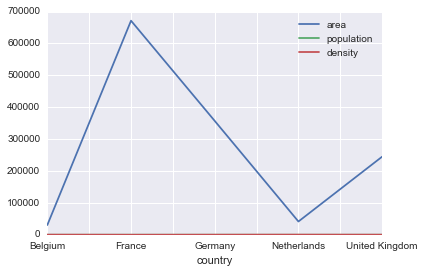

In [50]:
countries.plot()

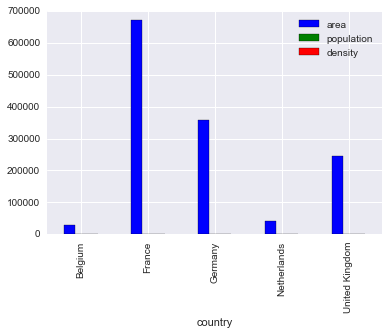

In [51]:
countries.plot(kind = 'bar')